# RFP: Targeted Taco Bell Ads

## Project Overview
You are invited to submit a proposal that answers the following question:

### What ad will you create for the new Garlic Nacho Fries and why?

*Please submit your proposal by **1/30/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you will need to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Customer Demographics](https://drive.google.com/file/d/1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS/view?usp=sharing)
- [Ad Response Data](https://drive.google.com/file/d/1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z/view?usp=sharing)

*Note, a level 5 dataset combines these two data sets.*

In [21]:
import pandas as pd
import seaborn as sb
import numpy as np

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   state             10000 non-null  object 
 2   sex               10000 non-null  object 
 3   age               10000 non-null  float64
 4   occupation        10000 non-null  object 
 5   family_size       10000 non-null  int64  
 6   income            10000 non-null  int64  
 7   ad_type           10000 non-null  object 
 8   ad_medium         10000 non-null  object 
 9   ad_response       10000 non-null  bool   
 10  items_purchased   10000 non-null  object 
 11  drinks_purchased  10000 non-null  object 
 12  Occurance         10000 non-null  float64
 13  ad_type_id        10000 non-null  float64
 14  ad_medium_id      10000 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(7)
memory usage: 1.1+ MB


### 2. Training Your Model
In the cell seen below, write the code you need to train a K-means clustering model. Make sure you describe the center of each cluster found.

*Note, level 5 work uses at least 3 features to train a K-means model using only the standard Python library and Pandas. A level 4 uses external libraries like scikit or numpy.*

In [39]:
# Train model here.
train_df, _ = train_test_split(df[df['Occurance'] > 0], test_size=0.3, random_state=42)
train_df = train_df[["income", "age", "ad_type_id", "ad_medium_id", "ad_response"]]

model = KMeans(n_clusters=2)
model.fit(train_df)

KMeans(n_clusters=2)

In [44]:
clusters = model.cluster_centers_

clusters

array([[4.68059874e+04, 3.60686892e+01, 3.51574127e+00, 1.64510590e+00,
        6.98340011e-01],
       [1.34102400e+05, 4.53613963e+01, 3.29774127e+00, 2.26488706e+00,
        6.48870637e-01]])

#### Don't forget to describe the centers of the clusters you found.

### 3. Testing Your Model
In the cell seen below, write the code you need to test your K-means model. Then, interpret your findings.

*Note, level 5 testing uses both an elbow plot and a silhouette score to evaluate your model. Level 4 uses one or the other.*

<Axes: xlabel='Clusters', ylabel='Inertia'>

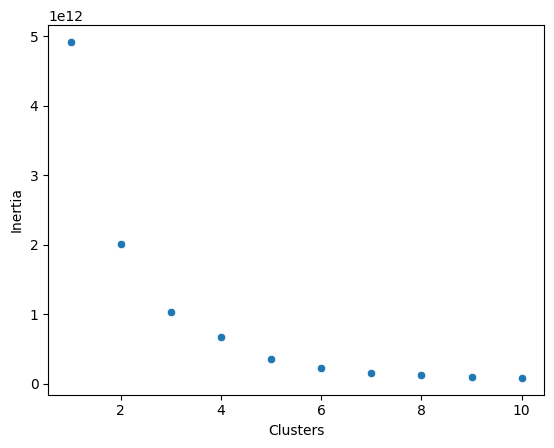

In [41]:
# Test model here.

plot = {
    'Clusters': range(1,11),
    'Inertia': []
}

wcss = []
k_values = range(1,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_df)
    plot['Inertia'].append(kmeans.inertia_)

sb.scatterplot(data = pd.DataFrame(plot), x='Clusters', y='Inertia')

,Clusters,Sillhouette
0,2,0.616614
1,3,0.559460
2,4,0.546235
3,5,0.596472
4,6,0.608339
5,7,0.607398
6,8,0.592960
7,9,0.606092
8,10,0.608499


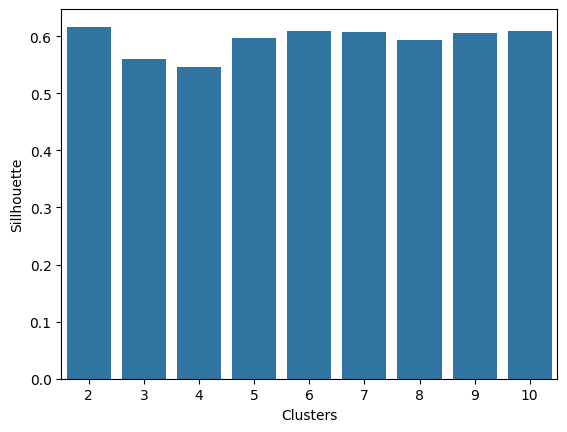

In [42]:
plot = {
    'Clusters': range(2,11),
    'Sillhouette': []
}

silhouette_scores = []
k_values = range(2, 11)  # Start from 2 because silhouette score is undefined for k=1
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(train_df)
    plot['Sillhouette'].append(silhouette_score(train_df, labels))

plot = pd.DataFrame(plot)

sb.barplot(data=plot, x='Clusters', y='Sillhouette')
plot

In [50]:
pd.read_csv('clusters.csv')
        

array([[4.68059874e+04, 3.60686892e+01, 3.51574127e+00, 1.64510590e+00,
        6.98340011e-01],
       [1.34102400e+05, 4.53613963e+01, 3.29774127e+00, 2.26488706e+00,
        6.48870637e-01]])

#### Interpret your elbow plot and/or silhouette score here.

The elbow plot made states that the most optimal amount of clusters to have is 5 because that's when it begins to minimize variance within the clusters. Although, the silhouette score states that the most optimal amount of clusters to have is two because the silhouette score for two clusters is the highest (being 0.61). However, I would rather rely off of the silhouette score because the silhouette score is best when cluster serperation matters because it focuses on maximizing the distance between the clusters by utilizing the average distance between all points in a cluster alongside the distance between all points in neighboring clusters. The reason I would prefer maximizing the distance between the clusters is because that way I can distinguish patterns in data (ie. this age group preferred this deal better) better to effectively create an ad that targets the appropriate audience.

### 4. Final Answer

In the first cell seen below, describe the cluster you have chosen to target with your ad, making sure to describe the type of ad they were the most likely to respond to. Then, use software of your choosing to create the ad you will need to target this cluster. You do not need to create an ad for both the nacho fries and the Baja Blast. You can focus on one if that's what your cluster cares about most.

In the second cell seen below, include a link to your ad.

*Note, a level 5 ad uses the medium (static image or video) the cluster most likely responded to.* 

#### Describe the cluster you are targeting here.

#### Link your ad here.